In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset from CSV
data = pd.read_csv('/content/Iris.csv')  # Replace with your file path if needed

# Show all parameters (features and label info)
print("🔍 Dataset Info:")
print(data.info())  # shows column names, data types, and non-null values

print("\n📊 Statistical Summary:")
print(data.describe())  # summary stats for numerical columns

print("\n📌 First 10 Rows of the Dataset:")
print(data.head(10))  # show first 10 rows

print("\n📎 Column Names (Parameters):")
print(data.columns.tolist())  # show all column names

# If needed: show the entire dataset (be careful with large files)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# print(data)

# Separate features and labels
X = data.drop('Species', axis=1)
y = data['Species']

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

print("\n🧩 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

📊 Statistical Summary:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.60

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


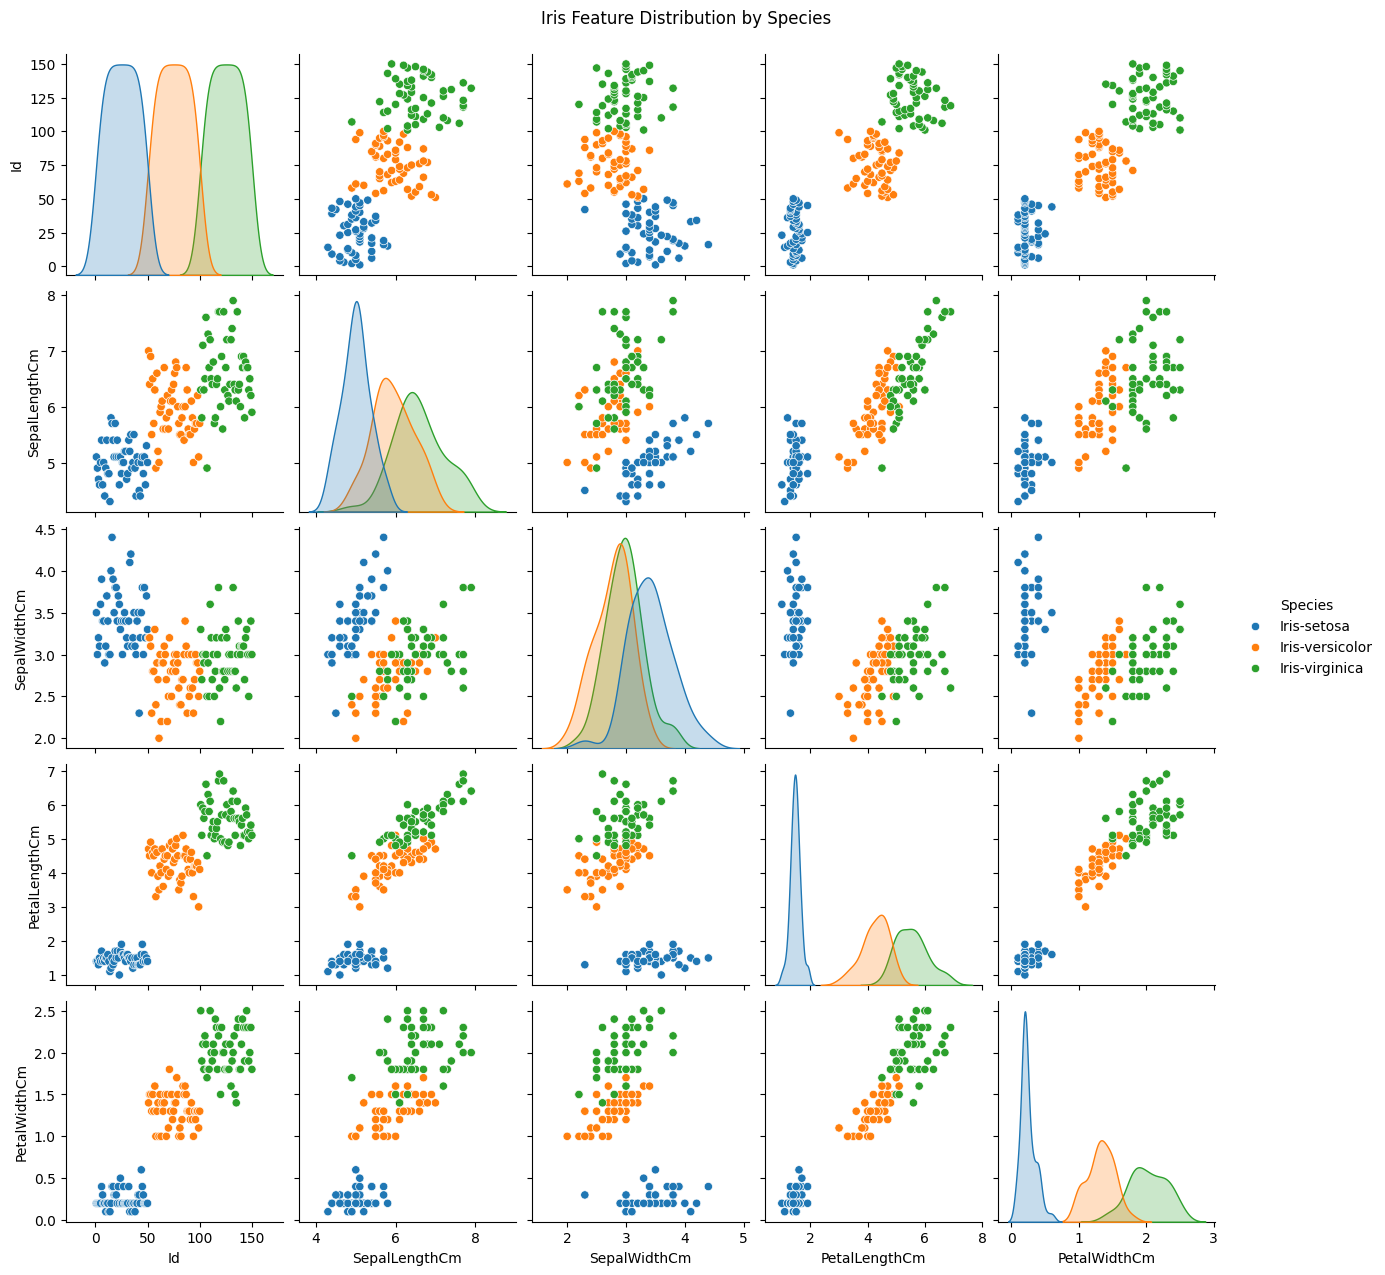

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize pairwise relationships
sns.pairplot(data, hue='Species')
plt.suptitle("Iris Feature Distribution by Species", y=1.02)
plt.show()
